In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing data set
df = pd.read_csv('hour.csv')

In [3]:
def data_information(data):
    print("Data shape  number_rows/number_columns{}".format(data.shape))
    print()
    print()
    print("Featurs in data sets are:\n{}".format(data.columns))
    print()
    print()
    print("Statistic view on data \n{}".format(data.describe()))
    print()
    print("Head of data set\n{}".format(data.head(5)))
    print()
    print("Tail of data set\n{}".format(data.tail(5)))
    print()
    print()
    print("Nan values in data set\n{}".format(data.isnull().sum()))

In [4]:
data_information(df)

Data shape  number_rows/number_columns(17379, 17)


Featurs in data sets are:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


Statistic view on data 
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.

In [5]:
#df_num is sub set of dataframe that consists only numeric values
def numeric_data(data):
    df_num =data.select_dtypes(include=["int64","float64"])
    return df_num

In [6]:
# function corelation matrix(argument is data_set)
def corr_matrix(data):
    df_num=data.select_dtypes(include=["int64","float64"])
    corr_matrix_origin = df_num.corr(method ='pearson')
    list_col_origin = list(df_num.columns)
    plt.figure(figsize = (20,10))
    ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 15},
                linecolor='black', center=False,  linewidths=.5)

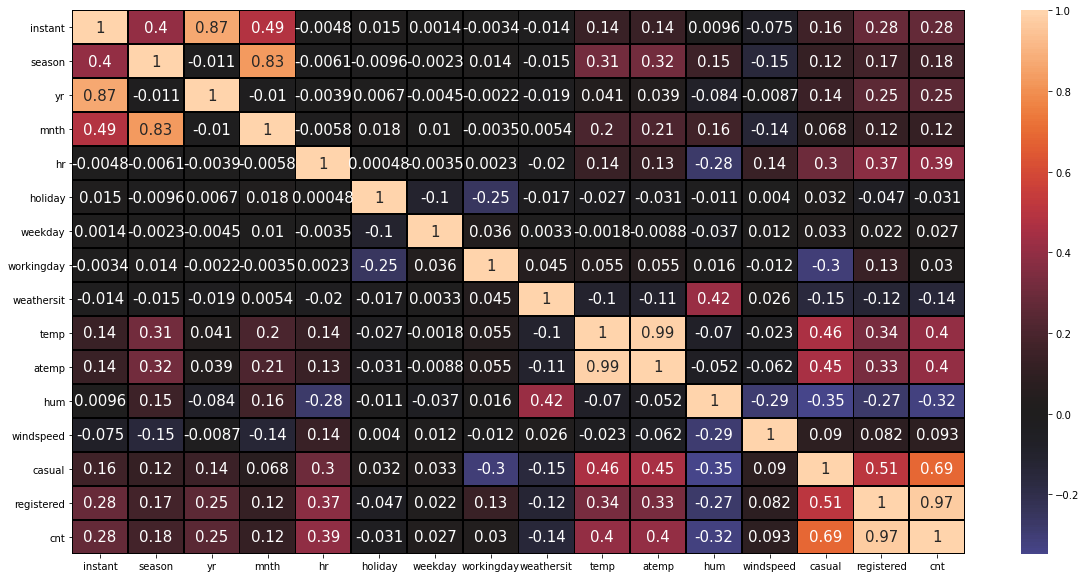

In [7]:
corr_matrix(df)

In [8]:
def numeric_feature_list(data):
    numeric_list=list(numeric_data(data).columns)
    return numeric_list
print(len(numeric_feature_list(df)))


16


In [9]:
#function distribution_histogram (arguments are list on numeric columns,number of row,nomer of columns
#figure size x,figuresize_Y,dataframe )
#functons should plot histograms for all numeric values in dataset, in number matric shape(nrow x ncolm we want)
def distribution_histogram(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.distplot(x,ax=ax)
        except(IndexError):
            pass

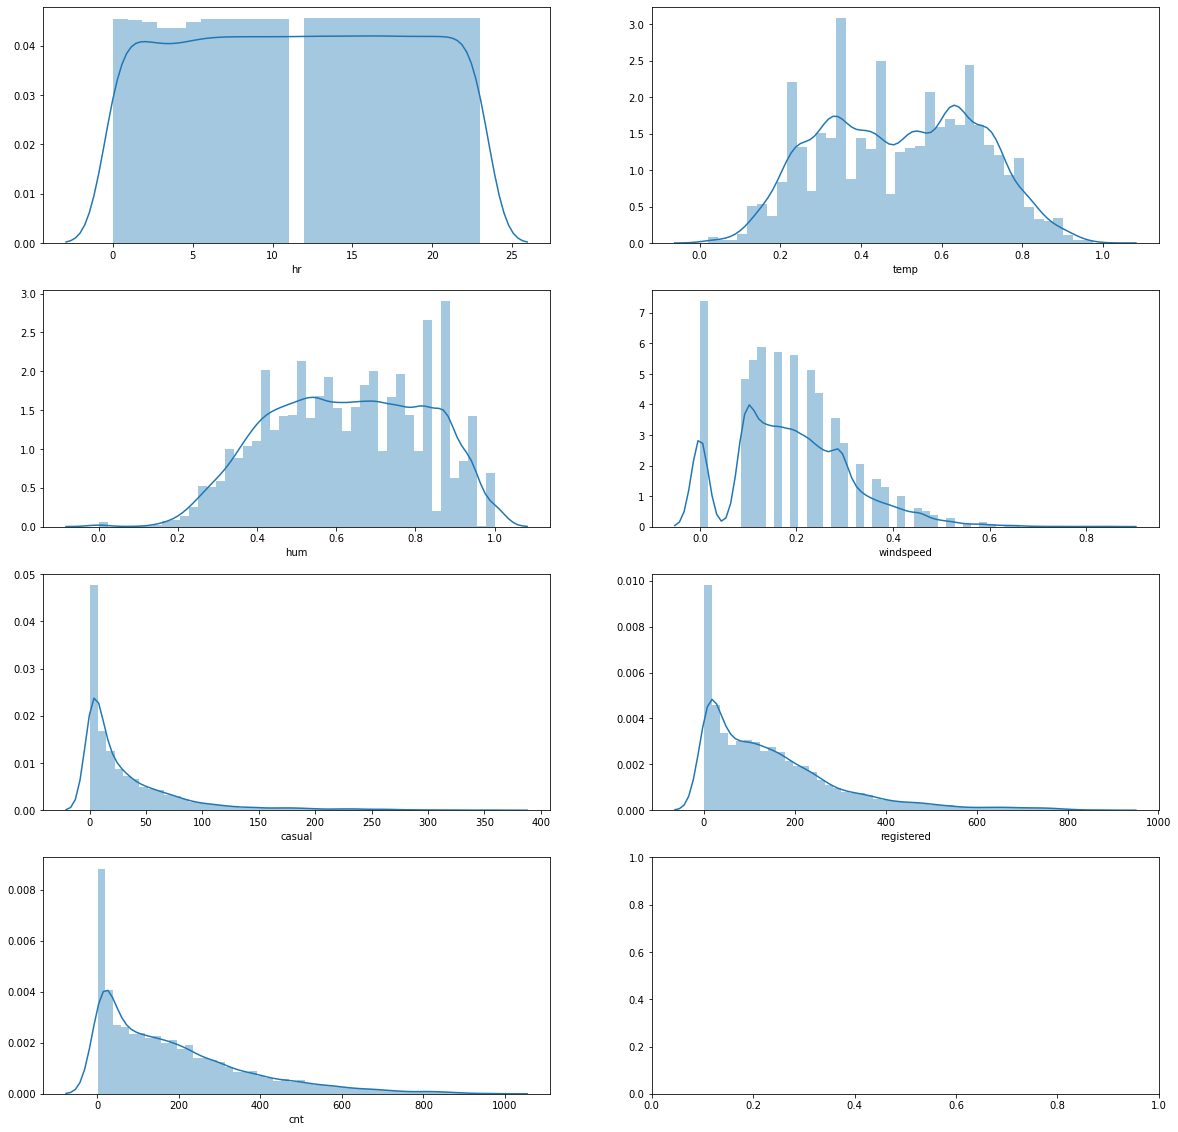

In [10]:
#call of distribution function that plot histograms for all numeric data
#first argument is list of numeric feature ( we make it by function numeric_feature_list)

distribution_histogram(['hr', 'temp', 'hum', 'windspeed','casual', 'registered', 'cnt'],4,2,20,20,numeric_data(df))

In [11]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.boxplot(x,ax=ax)
        except(IndexError):
            pass

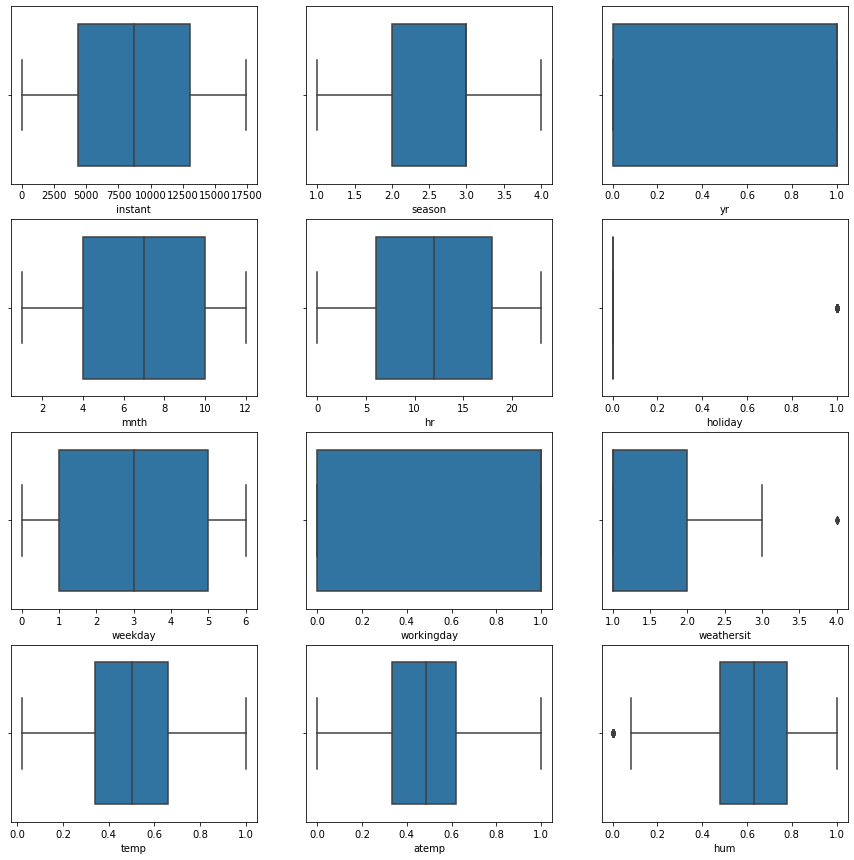

In [12]:

#distribution_histogram(num_cols,4,4,10,10,df_num)
distribution_boxplot(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],4,3,15,15,numeric_data(df))

In [13]:
def count_values(x_value,data_frame,rotation,hue):
    fig=plt.gcf()
    fig.set_size_inches(40,20)
    plot = sns.countplot(x =x_value, data=data_frame,hue=None)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation)

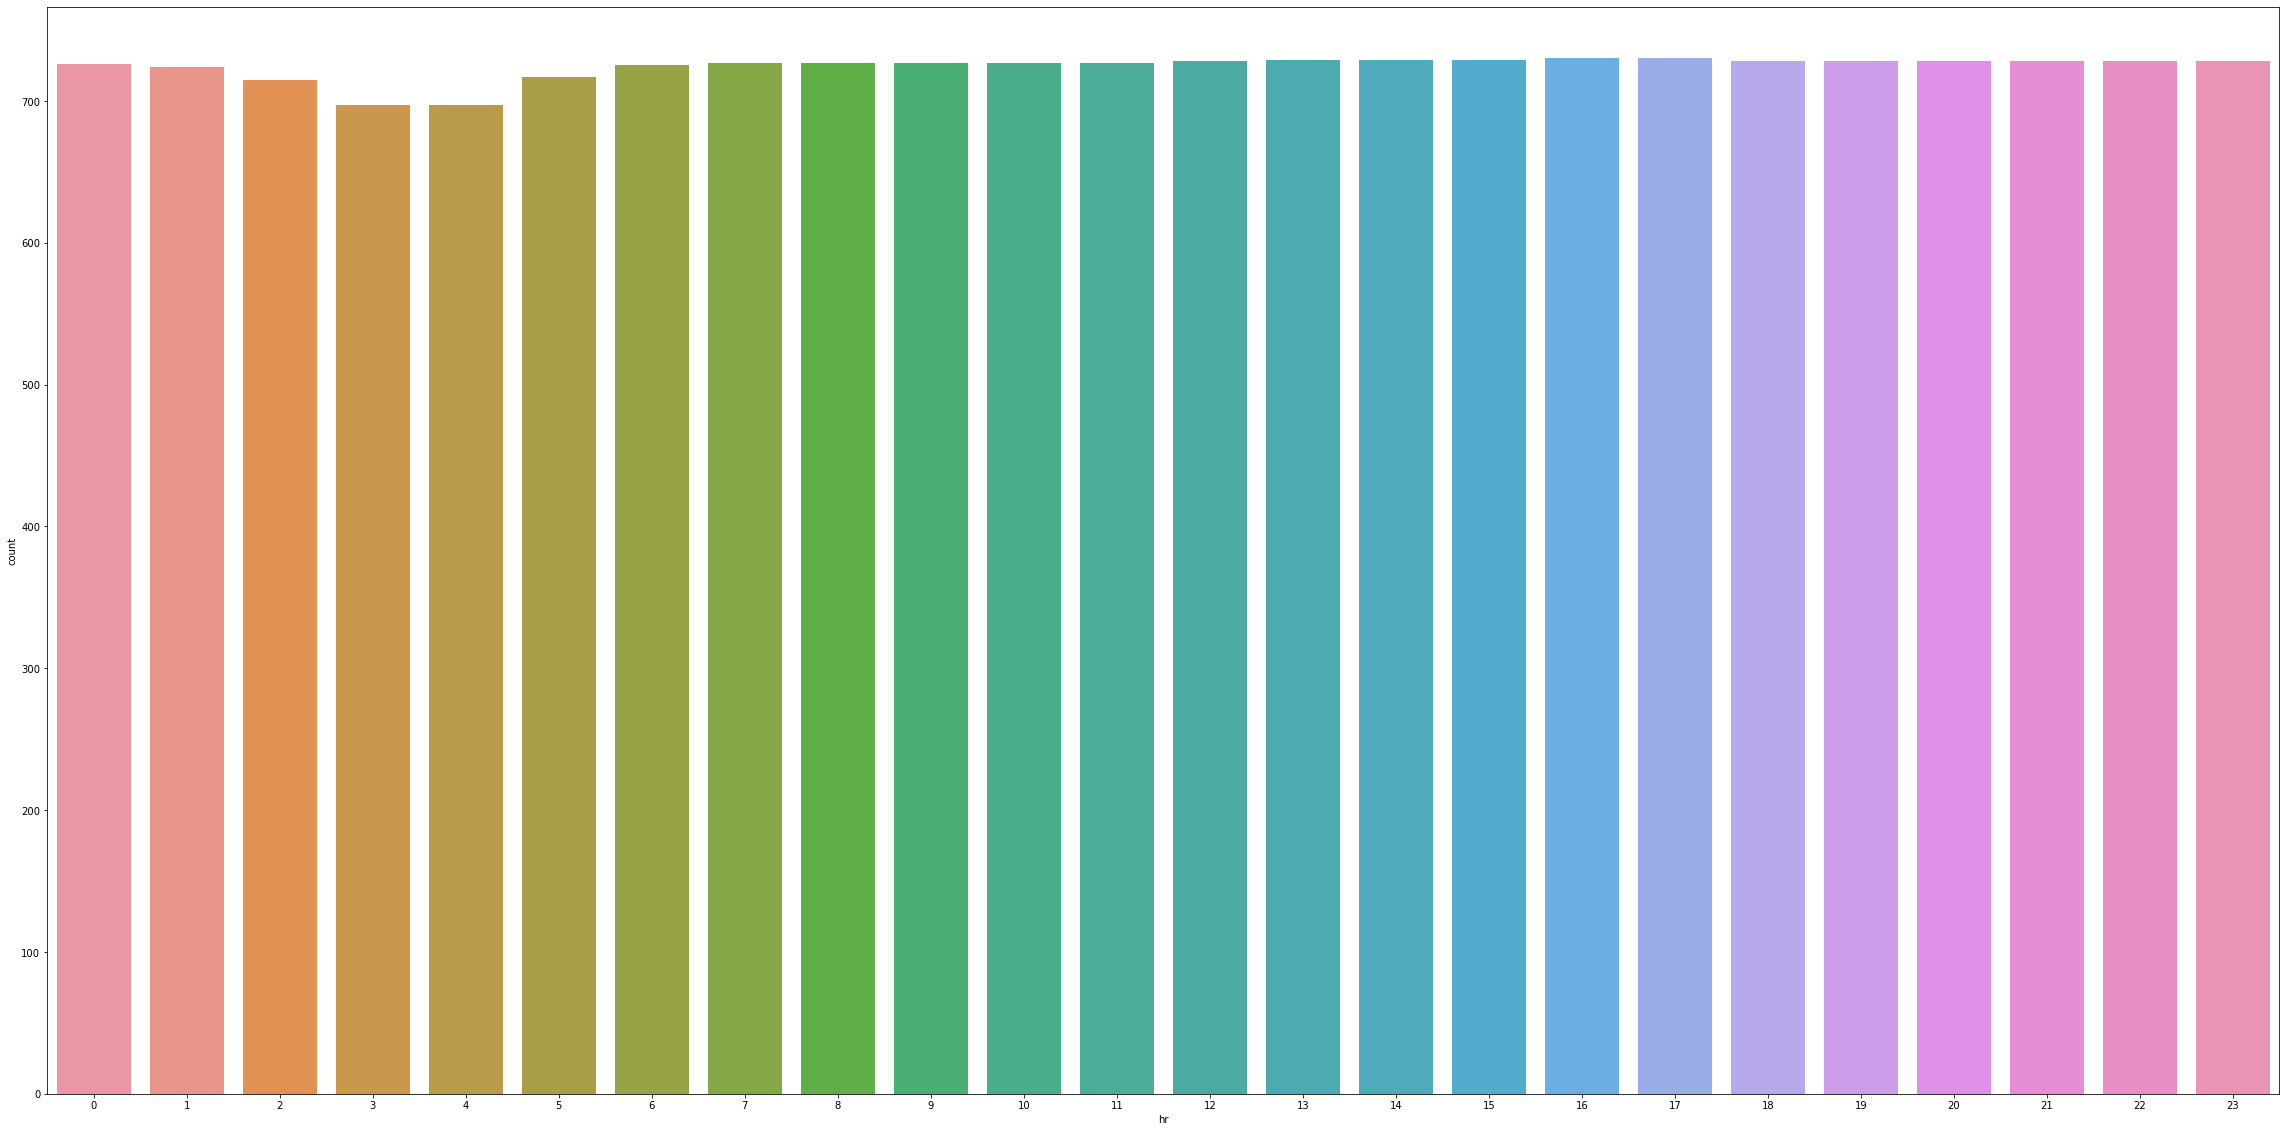

In [14]:
#count number of fire according to the month
count_values("hr",df,0,hue='cnt')

In [15]:
#dependans of damage aeria according to the firecarasteristic
def dependant_feature_to_undependant(nrow,ncols,figsize1,figsize2,data_set,dependant_feature):
    list_value=numeric_feature_list(data_set)
    list_value.remove(dependant_feature)
    fig, axs = plt.subplots(nrows =nrow,ncols =ncols, figsize = (figsize1,figsize2))
    for i in range(0, len(list_value)):
        try:
            rows =i //ncols
            cols =i % ncols
            ax = axs[rows,cols]
            plot = sns.regplot(x = list_value[i], y = dependant_feature, data =data_set, ax=ax)
        except:
            pass

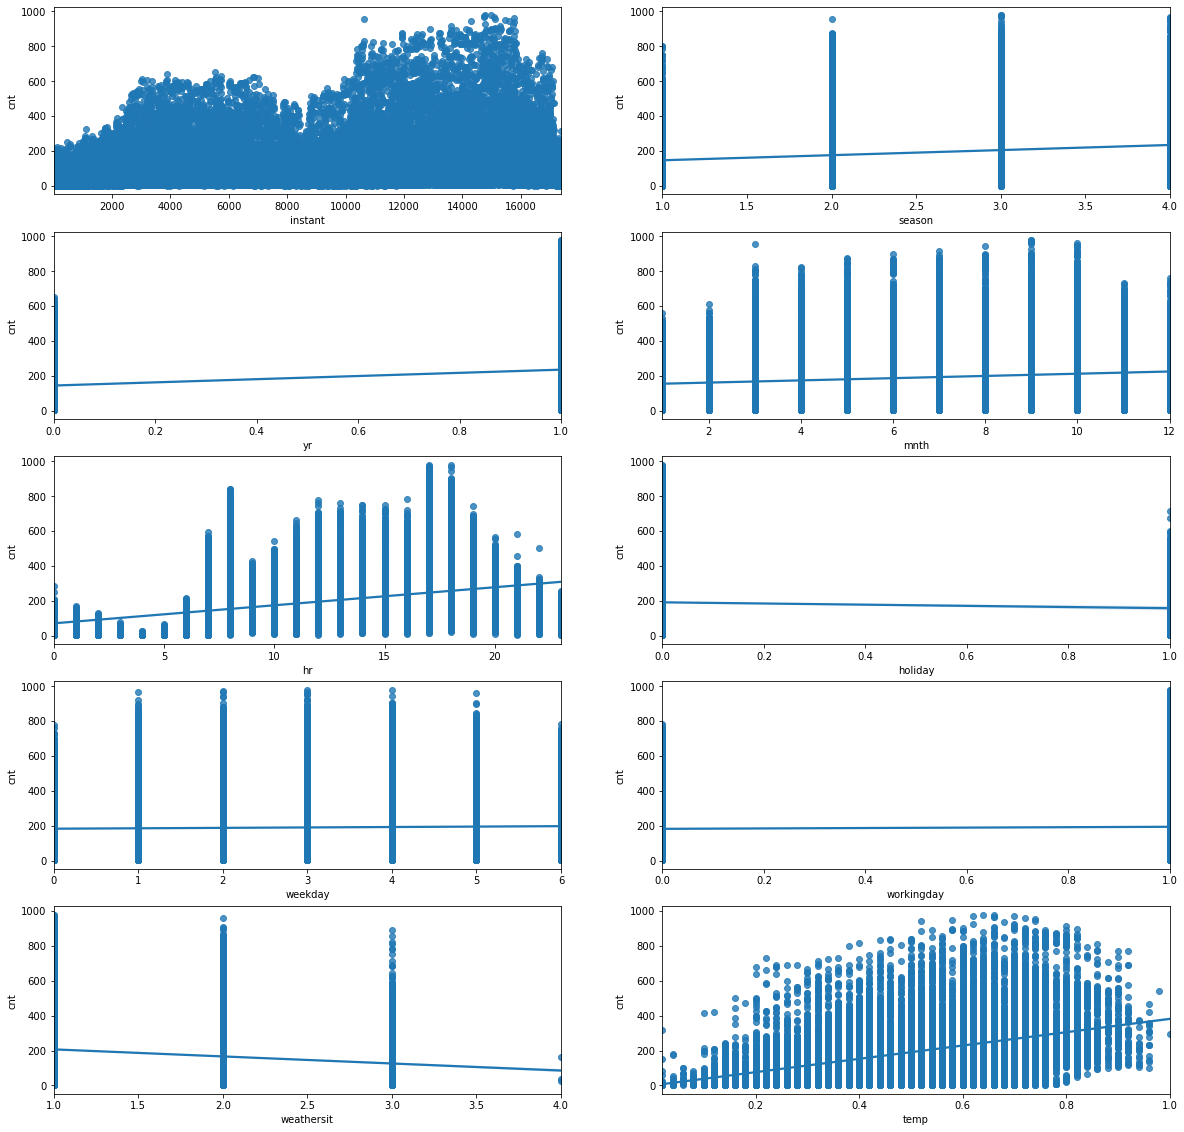

In [16]:
#dependans according to whole dataset
dependant_feature_to_undependant(5,2,20,20,df,"cnt")

In [18]:

df["hr"].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

In [19]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.boxplot(x, y , data = data,ax=ax)
        except(IndexError):
            pass

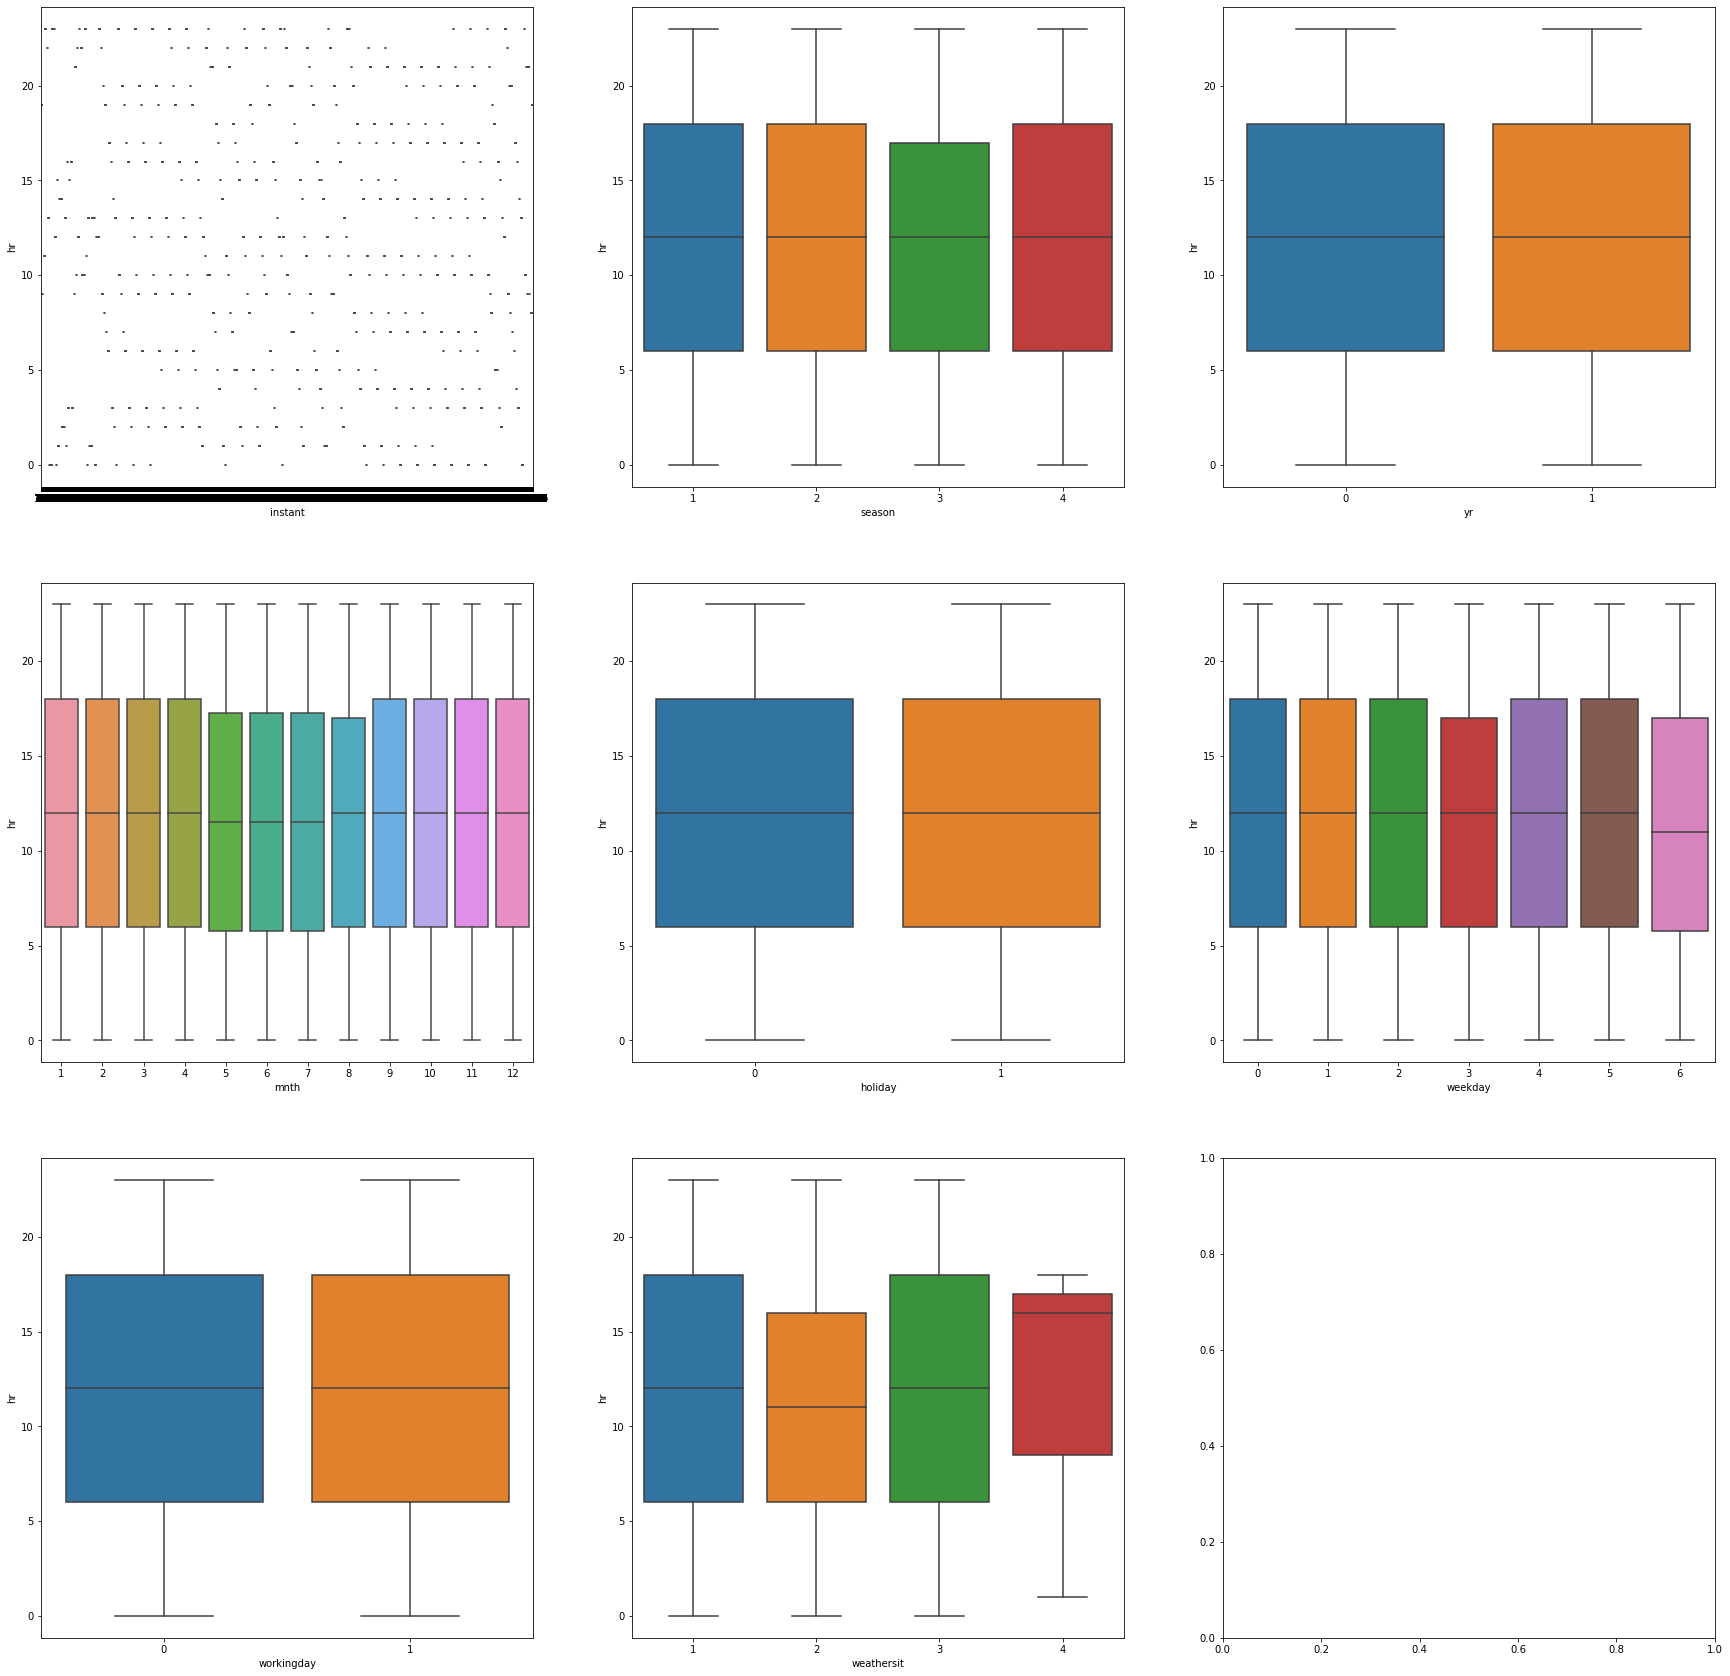

In [20]:
distribution_boxplot(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit'],3,3,30,30,df,"hr")

In [20]:
def distribution_scatterplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value,hue):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.scatterplot(x, y , hue = hue, data = data,ax=ax,color="purple")
        except(IndexError):
            pass

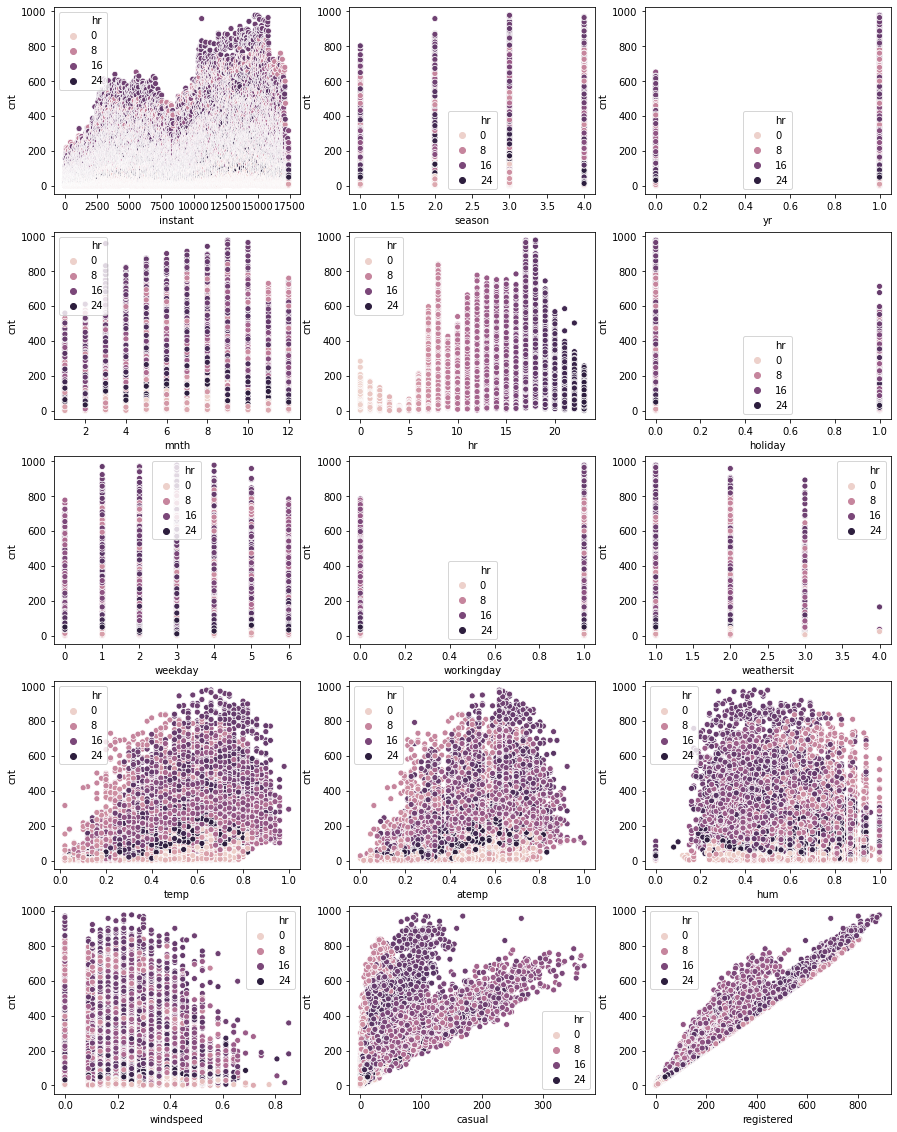

In [21]:
distribution_scatterplot(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],5,3,15,20,df,"cnt","hr")

In [22]:
def one_hot_encoder(feature_name):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(df.loc[:,[feature_name]])
    df_enc = pd.DataFrame(ohe.transform(df.loc[:, [feature_name]]).toarray(), columns=ohe.get_feature_names())
    return df_enc

In [23]:
df1_enc=one_hot_encoder("season")
df2_enc=one_hot_encoder("yr")
df3_enc=one_hot_encoder("mnth")
df4_enc=one_hot_encoder("hr")
df5_enc=one_hot_encoder("holiday")
df6_enc=one_hot_encoder("workingday")
df7_enc=one_hot_encoder("weekday")
df8_enc=one_hot_encoder("weathersit")

In [24]:
# Concatenation of data_set with new df_frames after one_hote_encoder
# if we have more feature to encode in list functon put all new datasets devided by coma
df_transform = pd.concat([df,df1_enc,df2_enc,df3_enc,df4_enc,df5_enc,df6_enc,df7_enc,df8_enc], axis=1)
df_transform.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_1,x0_2,x0_3,x0_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [25]:
def drop_categorical_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling

In [26]:
df_modeling=drop_categorical_feature(df_transform,["dteday","instant"])
df_modeling.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_1,x0_2,x0_3,x0_4
0,1,0,1,0,0,6,0,1,0.24,0.2879,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Split dataset on train and test

In [27]:
def split_data_set(data,dependant_feature,list_to_remove_X_test,test_size):
    from sklearn.model_selection import train_test_split
    y=data[dependant_feature]
    X=data.drop(list_to_remove_X_test,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    df_norm = pd.DataFrame(data = X_train, columns =X_train.columns)
    return X_train,X_test,y_train,y_test,df_norm

In [28]:
X_train,X_test,y_train,y_test,df_norm=split_data_set(df_modeling,"cnt",[],0.15)
df_norm.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_1,x0_2,x0_3,x0_4
10357,1,1,3,16,0,1,1,1,0.62,0.6212,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4891,3,0,7,17,0,3,1,1,0.84,0.7121,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3281,2,0,5,15,0,6,0,1,0.72,0.6515,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9647,1,1,2,22,0,6,0,2,0.14,0.1061,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10208,1,1,3,10,0,2,1,1,0.24,0.2576,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape:(14772, 72)
 y_train shape:(14772,)
 X_test shape:(2607, 72)
 y_test shape:(2607,)


In [30]:
# Function for normalization of data in data set
def normalisation(X_train,X_test):
    from sklearn.preprocessing import MinMaxScaler
    norm = MinMaxScaler()
    X_train_norm = norm.fit_transform(X_train)
    X_test_norm = norm.transform(X_test)
    return X_train_norm,X_test_norm

In [31]:
X_train_norm,X_test_norm=normalisation(X_train,X_test)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for 

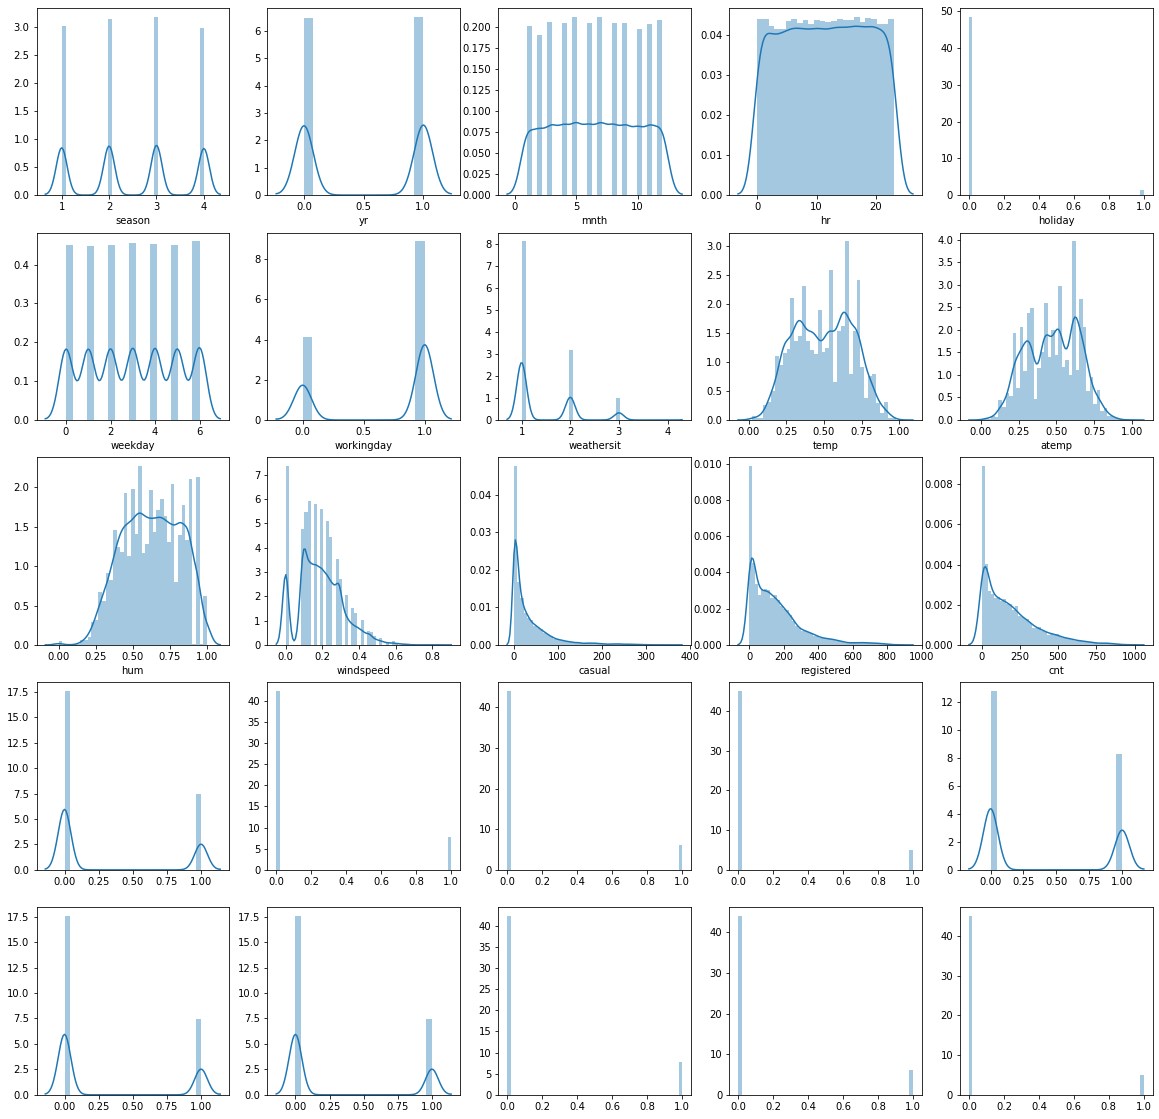

In [32]:
#plot normalized data
distribution_histogram(list(X_train.columns),5,5,20,20,df_norm)

In [33]:
# Function to standardize data 
def standardisation(X_train):
    from sklearn.preprocessing import StandardScaler
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    df_std = pd.DataFrame(data = X_train_std, columns = X_train.columns)
    return X_train_std,X_test_std,df_std

In [34]:
X_train_std,X_test_std,df_std=standardisation(X_train)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


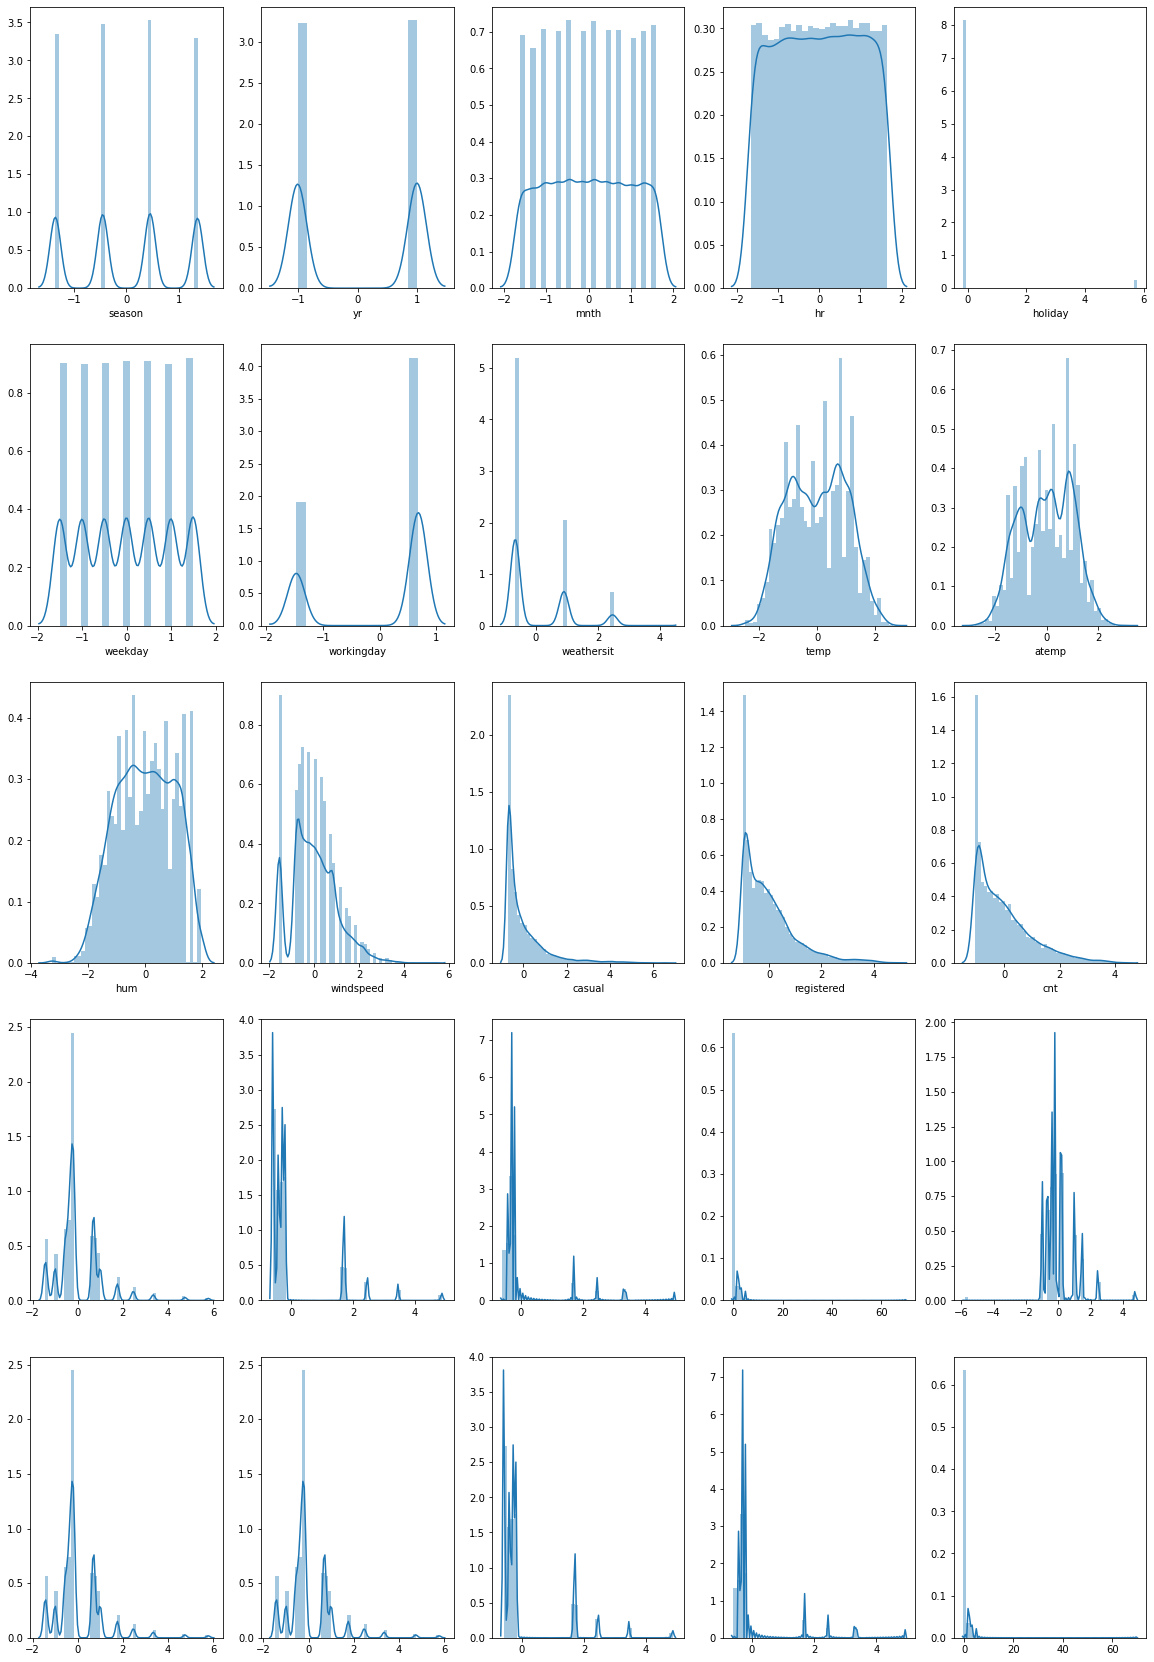

In [35]:
#plot standardized data
distribution_histogram(list(X_train.columns),5,5,20,30,df_std)

In [51]:
#import mean absolute and squared error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}
lista_modela=[]

In [52]:
# 

# Import models that will be applied on dataset

#1.model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model_ime=lin_reg
lista_modela.append(model_ime)

#2.model SVC kernel linear
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_ime=svr_linear
lista_modela.append(model_ime)

#3.model SVR_rbf
SVR_rbf=SVR()
model_ime=SVR_rbf
lista_modela.append(model_ime)

#4.model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_ime=ran_for_reg
lista_modela.append(model_ime)

#5.model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_ime=dec_tree_reg
lista_modela.append(model_ime)

#6.model ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
model_ime=extra_tree
lista_modela.append(model_ime)

#7.model BaggingRegressor
from sklearn.ensemble import BaggingRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_tree = BaggingRegressor(extra_tree, random_state=0)
model_ime=bag_tree
lista_modela.append(model_ime)

#8.model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
n_neighbor=KNeighborsRegressor()
model_ime=n_neighbor
lista_modela.append(model_ime)

#9.model Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
model_ime=ridge
lista_modela.append(model_ime)

#10.model Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
model_ime=lasso
lista_modela.append(model_ime)



In [53]:
#fuction model acespts arguments( model,X_train_std,y_train,X_test_std,y_test)
def model(model_ime,X_tr=X_train_std,y_tr=y_train,X_test_s=X_test_std,y_tst=y_test):
    #making model
    mod=model_ime
    mod.fit(X_train_std,y_train)
    y_pred=mod.predict(X_test_std)
    #mean absolut error
    MAE=mean_absolute_error(y_test,y_pred)
    MSE=mean_squared_error(y_test,y_pred)
    #appending errors to dictionary
    mean_sq_err_std[model_ime]=MSE
    mean_abs_err_std[model_ime]=MAE
    return(model_ime,MAE,MSE,y_pred)


In [54]:
def unique_list_model(lista_modela):
    model_unique=[]
    for model in lista_modela:
        if model not in model_unique:
            model_unique.append(model)
    return(model_unique)

In [55]:
lista_mod=unique_list_model(lista_modela)
print(lista_mod)



[LinearRegression(), SVR(C=1, kernel='linear'), SVR(), RandomForestRegressor(), DecisionTreeRegressor(), ExtraTreeRegressor(random_state=0), BaggingRegressor(base_estimator=ExtraTreeRegressor(random_state=0),
                 random_state=0), KNeighborsRegressor(), Ridge(), Lasso()]


In [62]:
for modell in lista_mod:
    model(modell)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95906.76222410236, tolerance: 48570.127496967245
  model = cd_fast.enet_coordinate_descent(


In [63]:
#Results of models 
df_ERROR = pd.DataFrame({'models':list(range(1,11)),'MAE': list(mean_abs_err_std.values()),"MSE":list(mean_sq_err_std.values())})
df_ERROR

,models,MAE,MSE
0,1,3.935322e-13,2.444421e-25
1,2,3.760268e-02,1.994443e-03
2,3,3.823799e+01,4.894507e+03
3,4,2.104334e-02,2.292858e-02
4,5,4.257768e-02,4.284618e-01
5,6,1.146912e-01,1.170311e+00
6,7,2.869582e-01,1.139114e+00
7,8,3.555573e+01,2.758919e+03
8,9,7.736511e-03,1.122685e-04
9,10,8.254565e-01,1.147910e+00


In [64]:
#Reslut of estimation of Mean squared error
lista_value_MSE=list(mean_sq_err_std.values())
Min_MSE=min(list(mean_sq_err_std.values()))
i=lista_value_MSE.index(Min_MSE)
print(f"Minimum of mean squared error is for model {lista_mod[i]},and value of MSE is {Min_MSE}")

Minimum of mean squared error is for model LinearRegression(),and value of MSE is 2.4444214458191897e-25


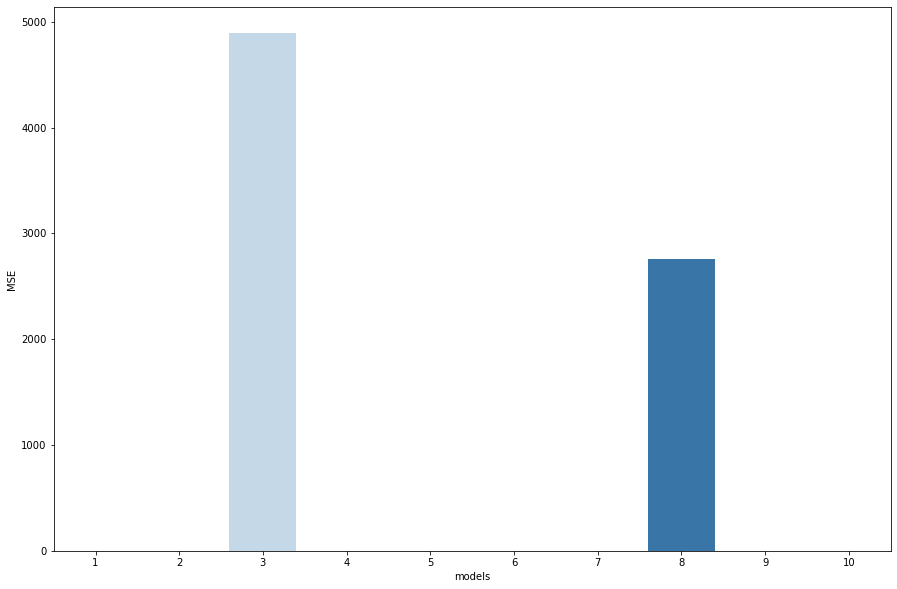

In [65]:

fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MSE",palette="Blues",data=df_ERROR,ci=None)


In [66]:
#Reslut of estimation of Mean squared error
lista_value_MAE=list(mean_abs_err_std.values())
Min_MAE=min(list(mean_abs_err_std.values()))
i=lista_value_MAE.index(Min_MAE)
print(f"Minimum of mean apsolute error is for model {lista_mod[i]},and value of MSE is {Min_MAE}")

Minimum of mean apsolute error is for model LinearRegression(),and value of MSE is 3.9353219996520656e-13


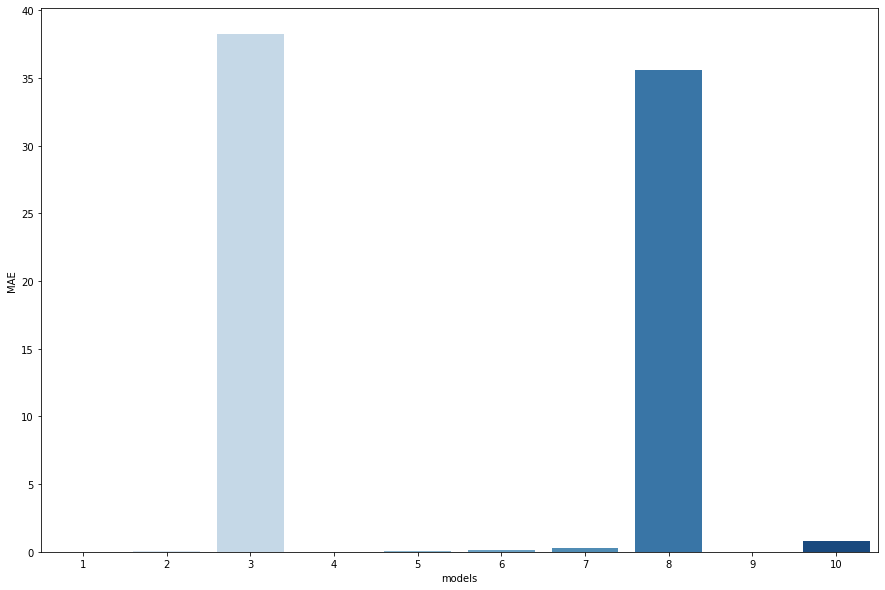

In [67]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MAE",palette="Blues",data=df_ERROR,ci=None)